# Assignment 1

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import pandas as pd    
 
# from drawnow import drawnow

import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

n = 100
meanA = [1.7, 1.7]
meanB = [-1.7, -1.7]
sigmaA = 0.5
sigmaB = 0.5

class MultiVar_Normal_Distri:
    def __init__(self, mean, cov, n):
        self.mean = mean
        self.cov = cov
        self.n = n
        self.labels = []
        self.give_distributions()
        self.vector = self.get_vector()
        self.set_labels()
        self.set_data()

    
    def give_distributions(self):
        self.x = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[0])[0]
        self.y = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[1])[0] 

    def get_vector(self):
        if self.x[0] < 0 or self.y[0] < 0 :
            return -1*(np.multiply(self.x, self.y))
        else:
            return np.multiply(self.x, self.y)
    
    def set_labels(self):
        for i in self.vector:
            if i > 0:
                self.labels.append(1.0)
            else:
                self.labels.append(0)

    def set_data(self):
        bias = -1*np.ones(len(self.x))
        self.training_data = np.array([list(self.x), list(self.y), bias, list(self.labels)])
        self.training_data = np.transpose(self.training_data)
        # np.random.shuffle(self.training_data)
        self.X = self.training_data[:, 0:3]
        self.Y = self.training_data[:, 3]

def randomise_data(dataA, dataB):
    all_data = np.concatenate((dataA,dataB), axis=0)
    np.random.shuffle(all_data)

    inputs = all_data[:, 0:3]
    labels = all_data[:, 3:4]
    return all_data, inputs, labels

def plot_data(dataA, dataB): 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.title('Data Set A1 vs B1') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    plt.legend(handles=[blue, red])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   

def plot_decision_boundry(dataA, dataB, weight_set):
    x_weight = weight_set[0]
    y_weight = weight_set[1]

    constant = x_weight**2 + y_weight**2
    d_y = []
    d_x = []
    for i in range(-100, 100, 1):
        inc = i/100
        d_y.append((constant-x_weight*i)/y_weight)
        d_x.append(inc)
 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.plot(d_x, d_y, color='orange')
    plt.title('Data Set A1, B1 and the decision boundry') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    orange = mpatches.Patch(color='orange', label='Boundry')
    plt.legend(handles=[blue, red, orange])
    plt.ylim([-4, 4])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   

def get_batch(X, Y, batch_size, index):
    return X[batch_size*index:batch_size*(index+1)], Y[batch_size*index:batch_size*(index+1)]

def h_output(x_batch, weight_matrix):
    return np.where(np.dot(x_batch,weight_matrix) > 0, 1, 0)


## Generation of linearly seperable data

In [57]:
dataA = MultiVar_Normal_Distri(meanA, sigmaA, n)
dataB = MultiVar_Normal_Distri(meanB, sigmaB, n)
randomised_data, inputs, labels = randomise_data(dataA.training_data, dataB.training_data)

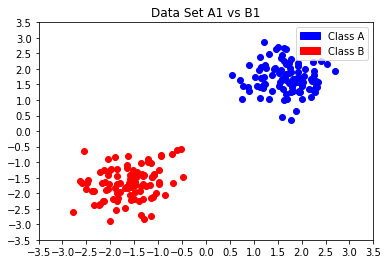

In [58]:
plot_data(dataA, dataB)

## Classification with a single-layer perceptron and analysis
- Use hard activation function @ 0  -> __(Used sigmoid below)__
- Class A results in neuron firing
- Class B results in neuron not firing
- The decision boundry needs to be created from the data
    - It is the normal of the weights 'vector' -> __final weight vector used for the model and to plot the decision boundry__ 
- First, will look at the __vector__ of each point. If it is in Q1, it should be on and if it is Q3 it should be off. 

__ DID NOT USE BELOW__
- The inputs are dataX.vector and the outputs are dataX.labels
    - Also, the inputs are dataX.X abd the labels are dataX.Y
    - where, dataX.X shows the x and y input coords- (2,100) - and dataX.Y the labels as (100,1) matrix (column) 

__DID USE__
- x and y coord of each are inputs to a neuron

### The Process
- Each class has two vectors which correspond to the x and y coords when plotted. 
- These are the two inputs to the perceptron. 
- If it is > 0, then the neuron should fire. If it is less than 0, the neuron should not fire. 
- Inputs -> W -> Sum -> Activation Fxn -> Output - TargetOutput
    - The output will either be a 1 or a zero. If it is +-1, weights must be changed.
    - $w - error*\eta*(the input)$

### The next block is just test code

In [59]:
import numpy as np
tx = np.array([  [1,2],
                [1,3],
                [1,4],
                [1,5],])
tweights = np.array([ [2],
                        [3],
                        [4] ])
tbias = np.array([ [3] ])
# o = tf.add( tf.matmul(tx, tweights), tbias )
# with tf.Session() as sess:
#     # init vars for session
#     print(o.eval())
#     print("Training Complete.")
#     sess.close()

In [60]:
np.random.shuffle(tx[0:2])
tx

array([[1, 3],
       [1, 2],
       [1, 4],
       [1, 5]])

__Training starts here__

In [61]:

def get_batch(X, Y, batch_size, index):
    return X[batch_size*index:batch_size*(index+1)], Y[batch_size*index:batch_size*(index+1)]

# The perceptron 
num_units = 1
num_inputs = 2 + 1 # +1 for bias
num_ouputs = 1

# Parameters
learning_rate = 0.2
epochs = 20
batch_size = 20
total_num_batches = int(inputs.shape[0]/batch_size) # 10 batches 

# these are placeholder variables that are assigned values later
# x now has many rows but 2 columns (y is also defined)
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_ouputs])

weights = tf.Variable(tf.random_normal([num_inputs, num_units])) # +1 for bias
# bias = tf.Variable(tf.random_normal([num_units]))


In [1]:
weights

NameError: name 'weights' is not defined

In [2]:
import numpy as np
N = 10
a = np.random.rand(N,N)
b = np.zeros((N,N+1))
b[:,:-1] = a


In [63]:
# activation_fxn(x*weights + b), a_fxn is a sigmoid?
output_b4_act = tf.matmul(x, weights) #tf.add(tf.matmul(x, weights), bias) 
output = tf.sigmoid(output_b4_act)

In [64]:
# cost or error function
cost_output = tf.reduce_mean(output - y)
# cost_output = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=output)).

# optimizer- grad descent
grad_descent_output = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_output)

-0.3588128
-0.44038686
-0.47787637
-0.49987736
-0.5150476
-0.52634746
-0.5351275
-0.5421418
-0.5478633
-0.55260926
-0.5566019
-0.56000197
-0.56292826
-0.5654707
-0.567698
-0.5696639
-0.57141083
-0.5729726
-0.5743766
-0.5756451
Training Complete.


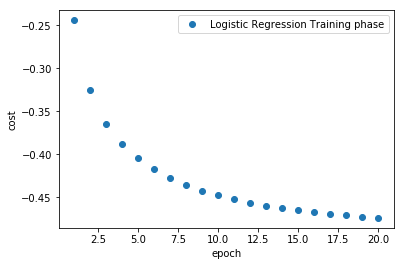

In [65]:
init = tf.global_variables_initializer()
avg_set = []
epoch_set = []
weight_set = []

with tf.Session() as sess:
    # init vars for session
    sess.run(init)

    # iterate through epochs (num of times through data) and batch to
    for e in range(epochs):
        avg_cost = 0

        for i in range(total_num_batches):
            x_batch, y_batch = get_batch(inputs, labels, batch_size, i)

            # Fit training data
            _,c = sess.run([grad_descent_output, cost_output], feed_dict={x: x_batch, y: y_batch})
            # Compute average loss
            avg_cost += c/total_num_batches
        print(c)
        epoch_set.append(e+1)
        avg_set.append(avg_cost)
        weight_set.append(weights.eval())
        # print("Epoch: ", e+1, " Loss: ", avg_cost)
    
    print("Training Complete.")
    # test model using the first couple of values (usually should not do this)
    # predictions = output.eval({x:inputs[:10]})
    # print(inputs[:10])
    # print(predictions)
    sess.close()

plt.plot(epoch_set,avg_set, 'o', label = 'Logistic Regression Training phase') 
plt.ylabel('cost') 
plt.xlabel('epoch') 
plt.legend() 
plt.show() 



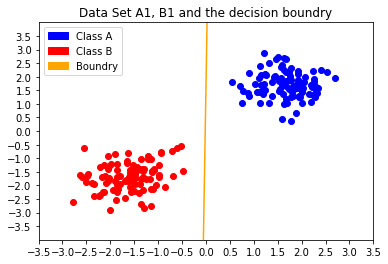

In [78]:
 
plot_decision_boundry(dataA, dataB, weight_set[19])

In [79]:
print(x_batch)

[[-1.29076835 -2.81561074 -1.        ]
 [ 1.52101512  1.45888544 -1.        ]
 [ 1.75723064  2.01881865 -1.        ]
 [ 2.25798807  1.9212781  -1.        ]
 [ 1.14206324  2.06588973 -1.        ]
 [ 1.43389938  2.016785   -1.        ]
 [ 2.39556588  2.26261767 -1.        ]
 [-2.22926265 -2.37155769 -1.        ]
 [-1.44969257 -1.3191884  -1.        ]
 [ 0.90014478  1.30580002 -1.        ]
 [-1.85665468 -2.24183688 -1.        ]
 [-1.62644015 -0.81442422 -1.        ]
 [-0.7088011  -0.72351181 -1.        ]
 [-0.94339071 -0.75885365 -1.        ]
 [ 2.1914936   1.6917878  -1.        ]
 [-1.45284508 -1.48380117 -1.        ]
 [ 1.37775647  1.79275814 -1.        ]
 [ 1.88532419  0.65833936 -1.        ]
 [ 2.01899788  1.58144181 -1.        ]
 [ 1.21116427  1.72699546 -1.        ]]


# 3.2.3


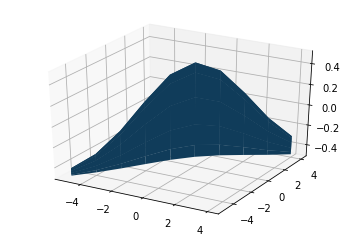

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.reshape(np.arange(-5, 5, 1, dtype=float), (-1,1))
y = np.reshape(np.arange(-5, 5, 1, dtype=float), (-1,1))
z = []

z = np.exp(-x*x*0.1) * np.exp(-y*y*0.1).T - 0.5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z)
plt.show()

# setup targes and inputs. Each input col has r[0] = x, r[1] = y
# these corres. to targets 
targets = np.reshape(z, (1,len(x)**2))
[xx, yy] = np.meshgrid(x,y)
patterns = np.append( np.reshape(xx, (1,len(x)**2)), np.reshape(yy, (1,len(x)**2)), axis=0 ) 

In [68]:
print(np.shape(patterns))
print(np.shape(targets))
np.shape(xx)

(2, 100)
(1, 100)


(10, 10)

In [69]:
class MLP:
    num_input = 2 + 1
    num_output = 1
    beta = 1

    def __init__(self, inputs, targets, num_hid_nodes, epochs, learning_rate):
        # input data
            # includes bias
        self.inputs_with_bias = self.setup_input_data(inputs)
        self.training_input = self.inputs_with_bias[0:self.num_input, 0:35].T
        self.testing_input = self.inputs_with_bias[0:self.num_input, 35:70].T
        self.validation_input = self.inputs_with_bias[0:self.num_input, 70:100].T

        # output data
        self.training_targets = np.reshape(targets[0:self.num_output, 0:35], (-1,1))
        self.testing_targets = np.reshape(targets[0:self.num_output, 35:70], (-1,1))
        self.validation_targets = np.reshape(targets[0:self.num_output, 70:100], (-1,1))

        # percepron(s) parameters
        self.num_hid_nodes = num_hid_nodes  
        self.epochs = epochs
        self.learning_rate = learning_rate

        # training parameters
        self.hidden_weights = np.ones((self.num_input, num_hid_nodes))*0.1
        self.output_weights = np.ones((self.num_hid_nodes+1, 1))*0.2

    def setup_input_data(self, inputs):
        inputs_with_bias = np.ones((np.shape(inputs)[0]+1,np.shape(inputs)[1]))*-1
        inputs_with_bias[:-1,:] = inputs
        return inputs_with_bias

    def fwd_pass(self, input_data):
        # activations from node1 in column 1,node2 in column 2... 
        hidden_layer_output = np.dot(input_data, self.hidden_weights)
        self.activations = 1/(1+np.exp(-self.beta*hidden_layer_output))

        # include bias output node
        self.activations_with_bias = self.setup_input_data(self.activations.T)
        self.activations_with_bias = self.activations_with_bias.T
        # output of MLP in vector 
        output_layer_output = np.dot(self.activations_with_bias, self.output_weights)
        self.output = 1/(1+np.exp(-self.beta*output_layer_output))        
    
    def bck_pass(self,target_data):
        # output error
        self.output_error = (self.output - target_data)*self.output*(1-self.output)
        # hidden layer error
        # loop through each error term
        self.hidden_layer_error = np.zeros((len(self.output_error),self.num_hid_nodes+1))
        for i in range(0, len(self.output_error)):
            # error vector for w_hidden_1, w_hidden_2, .... w_hidden_bias
            error = np.reshape(self.activations_with_bias[i]*(1-self.activations_with_bias[i]), (-1,1)) * (self.output_weights*self.output_error[i])
            error = np.reshape(error, (1,-1))
            # error for weight 1 in column 1, weight 2 in column 2 ... bias in last column
            self.hidden_layer_error[i] = error

    def average_errors(self, inputs):
        self.avg_output_error = np.reshape((np.sum(self.output_error))/np.shape(self.output_error)[0], (-1, 1))
        self.avg_hidden_error = np.reshape(np.sum(self.hidden_layer_error, 0)/np.shape(self.hidden_layer_error)[0], (-1, 1))
        self.avg_activations = np.reshape(np.sum(self.activations_with_bias, 0)/np.shape(self.activations_with_bias)[0], (-1, 1))
        self.avg_input_data = np.reshape(np.sum(inputs, 0)/np.shape(inputs)[0], (-1, 1))
    
    def update_weights(self):
        self.output_weights -= self.learning_rate*self.avg_output_error*self.avg_activations
        # self.hidden_weights -= self.learning_rate*self.avg_hidden_error*self.avg_input_data
        self.hidden_weights -= self.avg_input_data*(np.reshape(self.learning_rate*self.avg_hidden_error[0:self.num_hid_nodes], (1,-1)))

    def training(self):
        for e in range(0, epochs):
            self.fwd_pass(self.training_input)
            self.bck_pass(self.training_targets)
            self.average_errors(self.training_input)
            self.update_weights()
            print("Epoch: ", e, " has output error ", self.avg_output_error[0][0])
                
    def testing(self):
        self.fwd_pass(self.testing_input)
        return(x,y,z)
        return (testing_input[:,0],testing_input[:,1],self.output)



In [70]:
num_hid_nodes = 2
epochs = 20
learning_rate = 0.1

mlp = MLP(patterns, targets, num_hid_nodes, epochs, learning_rate)

In [71]:
mlp.training()

# mlp.training_input



Epoch:  0  has output error  0.2087475355086565
Epoch:  1  has output error  0.2068229491222933
Epoch:  2  has output error  0.20485871885371584
Epoch:  3  has output error  0.20286036300004662
Epoch:  4  has output error  0.20083304614696967
Epoch:  5  has output error  0.19878159209456023
Epoch:  6  has output error  0.19671049736188737
Epoch:  7  has output error  0.1946239450452812
Epoch:  8  has output error  0.19252581885120537
Epoch:  9  has output error  0.19041971716126496
Epoch:  10  has output error  0.18830896701591493
Epoch:  11  has output error  0.18619663792651356
Epoch:  12  has output error  0.18408555544377547
Epoch:  13  has output error  0.18197831442546505
Epoch:  14  has output error  0.179877291958136
Epoch:  15  has output error  0.17778465989751627
Epoch:  16  has output error  0.17570239700023008
Epoch:  17  has output error  0.17363230062631857
Epoch:  18  has output error  0.1715759979977437
Epoch:  19  has output error  0.16953495700293808


# Part 2

In [72]:
class Data:
    def __init__(self, beta, gamma, tau, n, x0):
        self.beta = beta
        self.gamma = gamma
        self.tau = tau
        self.n = n
        self.x0 = x0
        self.mac_glass_output = []
        self.mac_glass_output.append(x0)

    def gen_mackey_glass(self, t):
        for i in range(1, t):
            if i - 25 < 0:
                x_old = 0
            else: 
                x_old = self.mac_glass_output[i-25]

            x_next = self.mac_glass_output[-1] + (self.beta*x_old)/(1+x_old**10) - 0.1*self.mac_glass_output[-1] 
            self.mac_glass_output.append(x_next)

    def gen_data_set(self, data_range, data_shifts):
        num_of_pts = data_range[1]-data_range[0]
        self.x = []
        for i in range(0, len(data_shifts)):
            start = data_range[0]+data_shifts[i]
            stop = data_range[1]+data_shifts[i]+1
            self.x.append(self.mac_glass_output[start:stop])
        
        self.x = np.array(self.x).T


In [73]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

beta = 0.2
gamma = 0.1
tau = 25
n = 10
x0 = 1.5
t_total = 1600

t = np.arange(301, 310, 1, dtype=float)
data = Data(beta, gamma, tau, n, x0)
data.gen_mackey_glass(t_total)

data_range = [301,1500]
data_shifts = [-20, -15, -10, -5, 0]

data.gen_data_set(data_range, data_shifts)
_input = data.x

data_shifts = [5]
data.gen_data_set(data_range, data_shifts)
_output = data.x

# input data
input_training_data = _input[0:650, 0:5]
input_testing_data = _input[651:1300, 0:5]
input_validation_data = _input[1301:1500, 0:5]
# output data
output_training_data = _output[0:650]
output_testing_data = _output[651:1300]
output_validation_data = _output[1301:1500]

In [74]:
# Tests if mackey glass generation works
print(np.shape(_input))
print(type(_input))
# print(data.mac_glass_output[1500-20])
# print(data.mac_glass_output[1500-15])
# print(data.mac_glass_output[1500-10])
# print(data.mac_glass_output[1500-5])
# print(data.mac_glass_output[1500])
print()
print(np.shape(_output))
print(type(_output))
# print(_output[-1])
# print(data.mac_glass_output[1500+5])

(1200, 5)
<class 'numpy.ndarray'>

(1200, 1)
<class 'numpy.ndarray'>


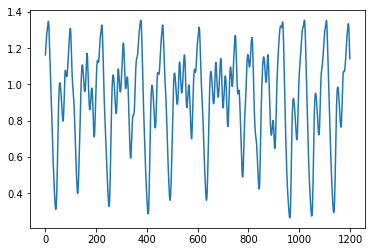

In [75]:
plt.figure()
plt.plot(_output)
plt.show() 

# The Network

In [76]:
class Network:
    def __init__(self):
        self.
num_units = 1
num_inputs = np.shape(input_testing_data)[1] + 1 # +1 for bias
num_ouputs = np.shape(output_testing_data)[1]

SyntaxError: invalid syntax (<ipython-input-76-913ecd18fa15>, line 3)

In [77]:
num_inputs

3